In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import datasets, linear_model
import sklearn.ensemble
import lime
import pycebox
from pycebox.ice import ice, ice_plot
from sklearn.metrics import mean_squared_error, r2_score
import itertools
import pdpbox
from pdpbox import pdp
from pdpbox.pdp_plot_utils import _pdp_contour_plot
from matplotlib.text import Text
from lime.lime_tabular import LimeTabularExplainer

In [2]:
dataset = sklearn.datasets.load_diabetes()
X_train,X_test,y_train,y_test = train_test_split(dataset.data,dataset.target,random_state = 0)
X = pd.DataFrame(dataset.data, columns=dataset.feature_names)
y = dataset.target
RF = sklearn.ensemble.RandomForestRegressor(n_estimators=100,min_samples_split =5)
est = RF.fit(X_train,y_train)
features = X.columns
N_JOBS=8
y_pred = est.predict(X_test)
print('Mean Squared Error: {}\n'.format(
    sklearn.metrics.mean_squared_error(y_pred,y_test)))

Mean Squared Error: 3629.3442528971364



# Linear Regression

Formula: Disease Progression 1 yr = 153.39 + 1010.34*BMI
Mean squared error: 6269.29
R squared: 0.28


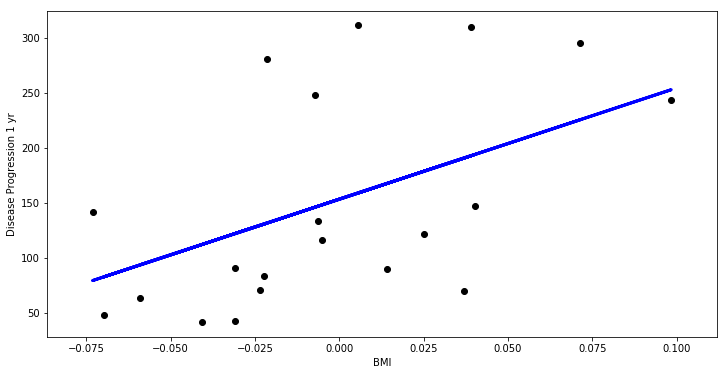

In [10]:
diabetes_X = X_train[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = y_train[:-20]
diabetes_y_test = y_train[-20:]
# Create linear regression object
regr = linear_model.LinearRegression(fit_intercept=True)

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Formula: Disease Progression 1 yr = {} + {}*BMI'.format(round(regr.intercept_,2),round(regr.coef_[0],2)))
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R squared: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.ylabel('Disease Progression 1 yr')
plt.xlabel('BMI');

plt.show()

# Decision Tree

Automatically created module for IPython interactive environment


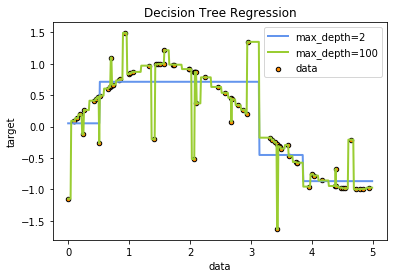

In [11]:
print(__doc__)

# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=100)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=100", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

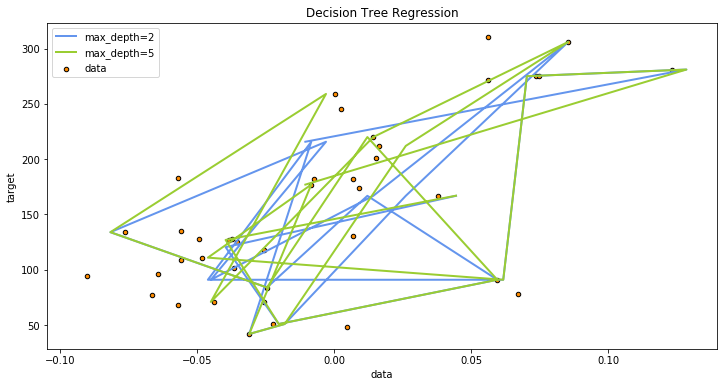

In [12]:
from sklearn.tree import DecisionTreeRegressor
diabetes_X = X_train[:60, np.newaxis, 2]
d_y_train = diabetes_y_train[:60]
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = d_y_train[:-20]
diabetes_y_test = d_y_train[-20:]
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=10)
regr_1.fit(diabetes_X_train, diabetes_y_train)
regr_2.fit(diabetes_X_train, diabetes_y_train)

# Predict
y_1 = regr_1.predict(diabetes_X_test)
y_2 = regr_2.predict(diabetes_X_test)

# Plot the results
fig, ax = plt.subplots(figsize=(12, 6))
plt.scatter(diabetes_X_train, diabetes_y_train, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(diabetes_X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(diabetes_X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# LIME

In [3]:
explainer = LimeTabularExplainer(X_train, mode='regression', 
                                 feature_names=features, 
                                 random_state=0, 
                                 discretize_continuous=False)
test_X_imp_df = pd.DataFrame(X_test, columns=features)
# the number of features to include in our predictions
num_features = len(features)
# the index of the instance we want to explain
exp_idx = 2
exp = explainer.explain_instance(test_X_imp_df.iloc[exp_idx,:].values, 
                                 RF.predict, num_features=num_features)
print("Local surrogate model for chosen instance: \n Prediction: {} \n Bias: {}\n True target".format(exp.local_pred[0],
                                                                                      exp.intercept[0]),
     y_test[2])

Local surrogate model for chosen instance: 
 Prediction: 163.43412085564748 
 Bias: 152.43541512052337
 True target 127.0


In [4]:
lime_expl = test_X_imp_df.apply(explainer.explain_instance, 
                                       predict_fn=RF.predict, 
                                       num_features=len(X.columns),
                                       axis=1)

In [5]:
%matplotlib inline
exp.show_in_notebook()

In [6]:
lime_dfs = [pd.DataFrame(dict(expl.as_list() + [('bias', expl.intercept[0])]), index=[0]) 
            for expl in lime_expl]
# then concatenate them into one big DataFrame
lime_expl_df = pd.concat(lime_dfs, ignore_index=True)

other_lime_cols = ['bias', 'True', 'Predict']
lime_feat_contrib = lime_expl_df
y_test_and_pred_df = pd.DataFrame(np.column_stack((y_test, RF.predict(X_test))),
                                  columns=['True', 'Predict'])
lime_feat_contrib[other_lime_cols] = pd.DataFrame(np.column_stack((lime_expl_df.bias,
                                                                   y_test_and_pred_df)))

lime_feat_contrib.sort_values('Predict', inplace=True)


# SHAP

In [7]:
import shap
# create our SHAP explainer

shap.initjs()
explainer = shap.TreeExplainer(RF)
shap_values = explainer.shap_values(X_test)
shap_values = np.round(shap_values,2)
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test[0,:],feature_names=features)

In [8]:
shap.force_plot(explainer.expected_value, shap_values, X_test,feature_names=features)

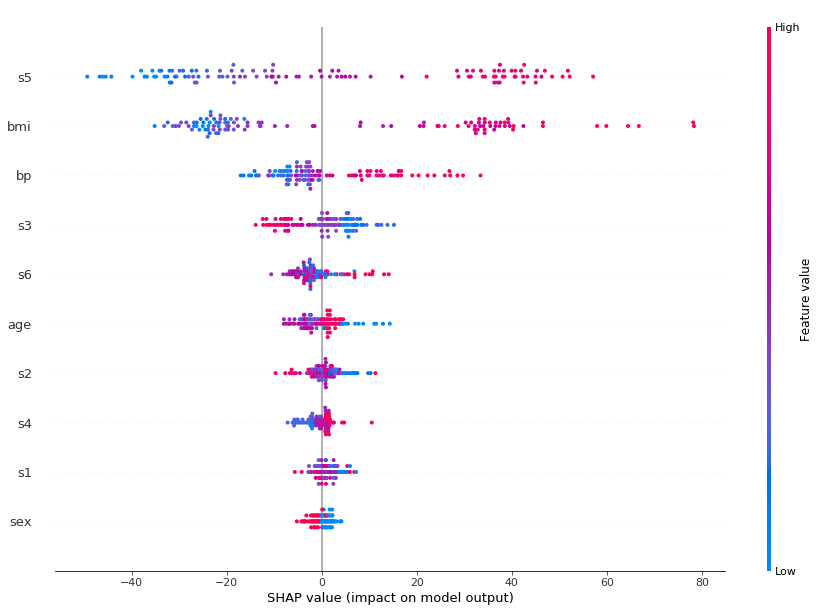

In [9]:
shap.summary_plot( shap_values, X_test,feature_names  = X.columns,plot_size = (15,10))

# Comparision between SHAP and LIME on a global level

In [29]:
lime_feat_contrib.iloc[:, :10][features]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
82,0.737707,-1.034911,22.183154,9.655502,-0.513508,-1.412793,-6.708611,1.357542,26.247500,1.700143
51,-0.180607,-1.355121,22.452420,9.250518,-0.283139,-1.591079,-6.340421,0.624621,26.081749,1.422969
70,0.549610,-1.305460,22.206544,9.727652,-0.145015,-1.450088,-6.999035,0.777121,26.871211,2.277512
31,0.036405,-1.235486,21.584183,8.407647,-0.626144,-1.876095,-6.574482,0.738189,25.755721,1.586622
27,0.841495,-0.839883,22.543521,8.393628,-1.160398,-1.877725,-7.025337,0.804302,27.826191,2.302752
...,...,...,...,...,...,...,...,...,...,...
110,0.463878,-1.089646,26.661008,10.541743,-0.662666,-2.399214,-5.835310,0.723273,28.077574,2.352592
107,-0.273838,-1.845743,27.979609,10.642654,-1.375275,-0.964970,-5.454460,1.461426,28.804788,3.360827
0,0.993828,-0.258508,28.620934,12.277447,-1.106198,-2.144591,-5.623595,0.899737,28.846404,2.690650
64,0.423817,-1.161008,26.880273,10.426723,-0.626322,-2.816468,-5.418280,1.281612,27.858034,2.514912


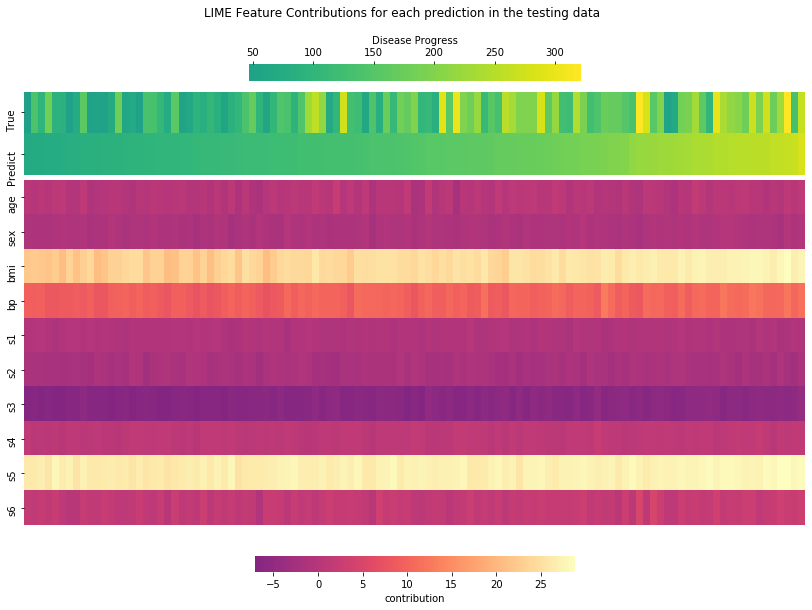

In [30]:
title = 'LIME Feature Contributions for each prediction in the testing data'
fig = double_heatmap(lime_feat_contrib[['True', 'Predict']].T,
                     lime_feat_contrib.iloc[:, :10][features].T, title=title,
                     cbar_label1='Disease Progress', cbar_label2='contribution', 
                     subplot_top=0.9)
# set the x-axis label for the bottom heatmap
# fig has 4 axes object, the first 2 are the heatmaps, the other 2 are the colorbars

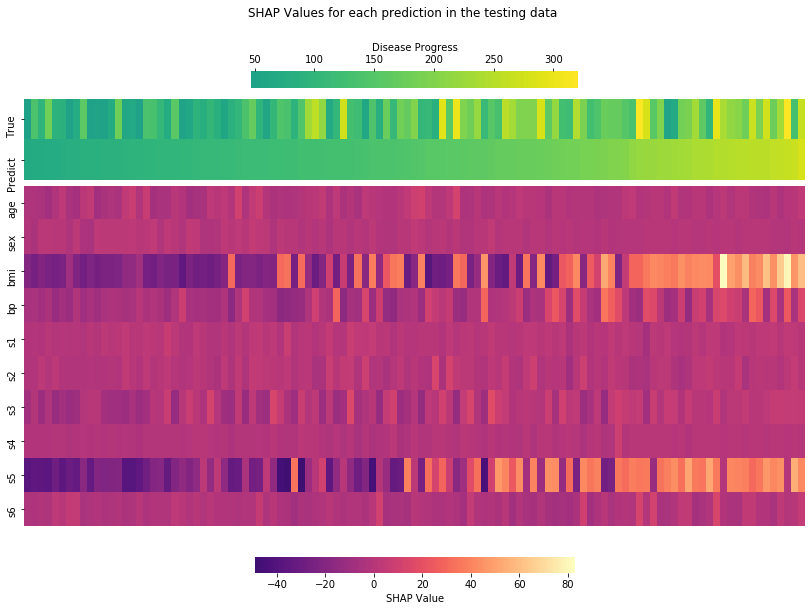

In [25]:
y_test_and_pred_df = pd.DataFrame(np.column_stack((y_test, RF.predict(X_test))),
                                  columns=['True', 'Predict'])
test_shap_df = pd.DataFrame(np.column_stack((shap_values, y_test_and_pred_df)),
                            columns= X.columns.tolist() + ['True', 
                                                 'Predict'])
test_shap_df.sort_values('Predict', inplace=True)

title = 'SHAP Values for each prediction in the testing data'
fig = double_heatmap(test_shap_df[['True', 'Predict']].T,
                     test_shap_df[features].T, 'Disease Progress', 'SHAP Value',
                     title=title, subplot_top=0.89)


# Partial Dependence Plots (PDP) and Individual Conditional Expectation

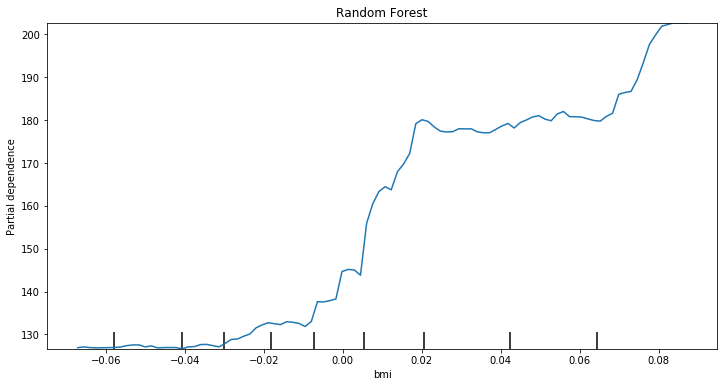

In [12]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Random Forest")
ax.set_ylim([50,350])
tree_disp = plot_partial_dependence(RF, X, ['bmi'], ax=ax)

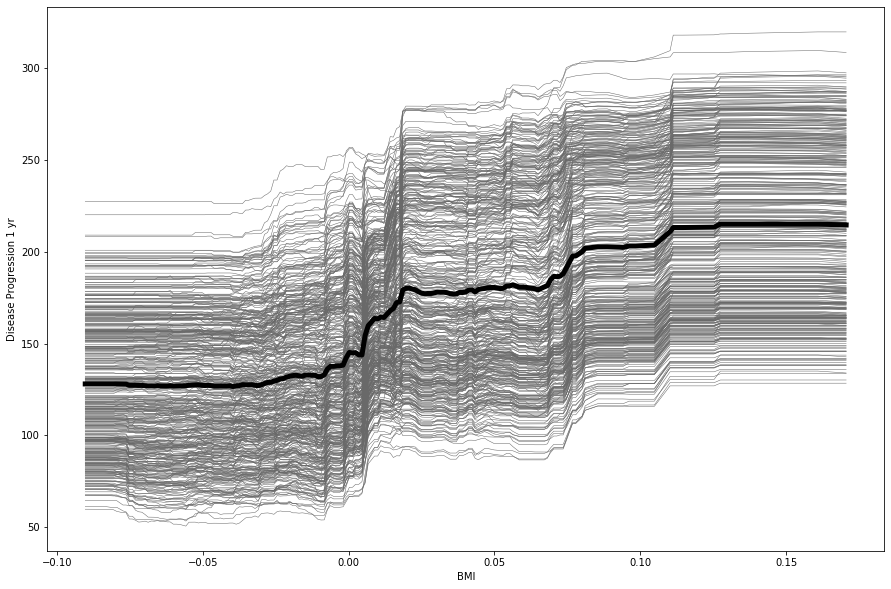

In [13]:
ice_X = ice(data=X, column='bmi', 
                   predict=RF.predict)
fig, ax = plt.subplots(figsize=(15, 10))
cmap2 = plt.get_cmap('OrRd')
ice_plot(ice_X, linewidth=.5, cmap=cmap2, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5},ax = ax, c = 'dimgray')
wt_vals = X['age'].values
ax.set_ylabel('Disease Progression 1 yr')
ax.set_xlabel('BMI');

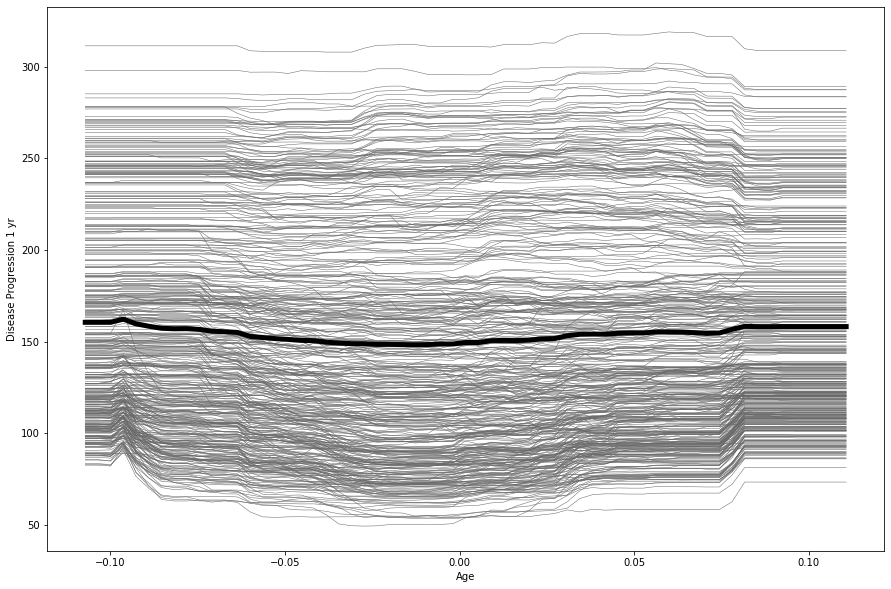

In [14]:
ice_X = ice(data=X, column='age', 
                   predict=RF.predict)
fig, ax = plt.subplots(figsize=(15, 10))
cmap2 = plt.get_cmap('OrRd')
ice_plot(ice_X, linewidth=.5, cmap=cmap2, plot_pdp=True, 
         pdp_kwargs={'c': 'k', 'linewidth': 5},ax = ax, c = 'dimgray')
wt_vals = X['age'].values
ax.set_ylabel('Disease Progression 1 yr')
ax.set_xlabel('Age');

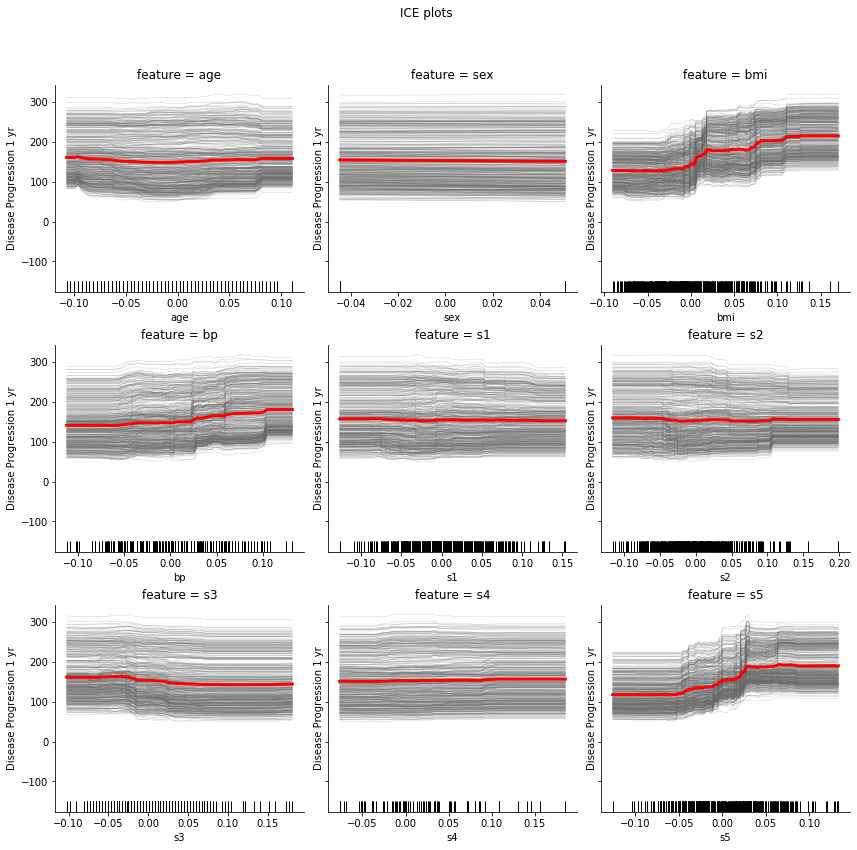

In [15]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=3, 
                  ncols=3, figsize=(12, 12), sharex=False, sharey=True, 
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the 
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

train_ice_dfs = {feat: ice(data=X, column=feat, predict=RF.predict) 
                 for feat in X.columns}

fig = plot_ice_grid(train_ice_dfs, X, X.columns,
                    ax_ylabel='Disease Progression 1 yr', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
fig.tight_layout()
fig.suptitle('ICE plots ')
fig.subplots_adjust(top=0.89);

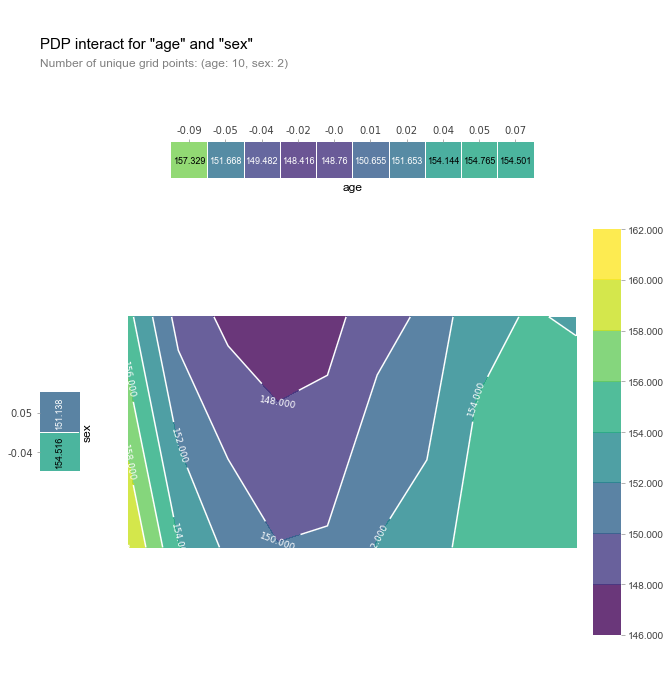

In [16]:
inter1 = pdp.pdp_interact(model=RF,
                          dataset=X,
                          model_features=features,
                          features=['age', 'sex'],
                          num_grid_points=[10, 10],
                          percentile_ranges=[(5, 95), (5, 95)])
fig, axes = pdp.pdp_interact_plot(pdp_interact_out=inter1,
                                  feature_names=['age', 'sex'],
                                  plot_type='contour',
                                  x_quantile=True,
                                  plot_pdp=True)

# Permutation Feature Importance

In [17]:
r = permutation_importance(RF, X_test, y_test,
                            n_repeats=100,
                            random_state=0)

NameError: name 'permutation_importance' is not defined

In [ ]:
all_feat_imp_df = pd.DataFrame(data=r.importances.T,
                               columns=features)
fig,ax = plt.subplots(figsize=(15,10))

(sns.boxplot(data=all_feat_imp_df)
        .set(title='Feature Importance Distributions',
             ylabel='Importance'))

In [18]:
def double_heatmap(data1, data2, cbar_label1, cbar_label2,
                   title='', subplot_top=0.86, cmap1='viridis', cmap2='magma', 
                   center1=0.5, center2=0, grid_height_ratios=[1,4],
                   figsize=(14,10)):
    # do the actual plotting
    # here we plot 2 seperate heatmaps one for the predictions and actual percentiles
    # the other for the contributions
    # the reason I chose to do this is because of the difference in magnitudes
    # between the percentiles and the contributions
    fig, (ax,ax2) = plt.subplots(nrows=2, figsize=figsize, 
                                 gridspec_kw={'height_ratios':grid_height_ratios})

    fig.suptitle(title)
    fig.subplots_adjust(hspace=0.02, top=subplot_top)

    # heatmap for actual and predicted percentiles
    sns.heatmap(data1, cmap="viridis", ax=ax, xticklabels=False, center=center1,
                cbar_kws={'location':'top', 
                          'use_gridspec':False, 
                          'pad':0.1,
                          'label': cbar_label1})
    ax.set_xlabel('')

    # heatmap of the feature contributions
    sns.heatmap(data2, ax=ax2, xticklabels=False, center=center2, cmap=cmap2,
                cbar_kws={'location':'bottom', 
                          'use_gridspec':False, 
                          'pad':0.07, 
                          'shrink':0.41,
                          'label': cbar_label2})
    ax2.set_ylabel('');
    return fig

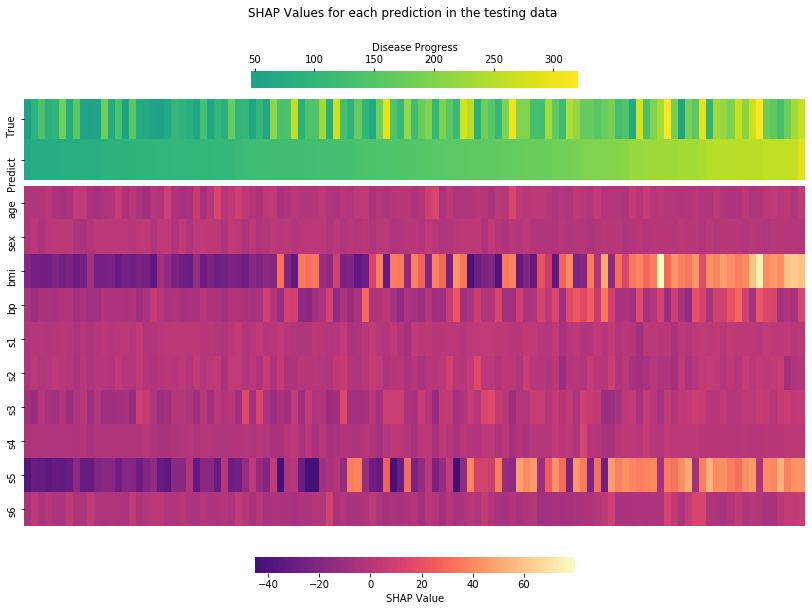

In [127]:
y_test_and_pred_df = pd.DataFrame(np.column_stack((y_test, RF.predict(X_test))),
                                  columns=['True', 'Predict'])
test_shap_df = pd.DataFrame(np.column_stack((shap_values, y_test_and_pred_df)),
                            columns= X.columns.tolist() + ['True', 
                                                 'Predict'])
test_shap_df.sort_values('Predict', inplace=True)

title = 'SHAP Values for each prediction in the testing data'
fig = double_heatmap(test_shap_df[['True', 'Predict']].T,
                     test_shap_df[features].T, 'Disease Progress', 'SHAP Value',
                     title=title, subplot_top=0.89)


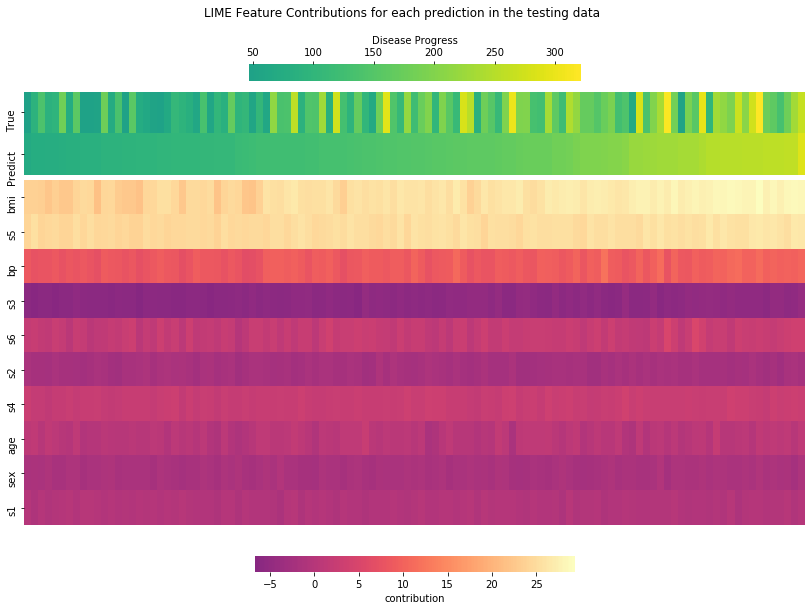

In [126]:
title = 'LIME Feature Contributions for each prediction in the testing data'
fig = double_heatmap(lime_feat_contrib[['True', 'Predict']].T,
                     lime_feat_contrib.iloc[:, :10].T, title=title,
                     cbar_label1='Disease Progress', cbar_label2='contribution', 
                     subplot_top=0.9)
# set the x-axis label for the bottom heatmap
# fig has 4 axes object, the first 2 are the heatmaps, the other 2 are the colorbars